# Explore here

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2

from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pickle

In [2]:
#import and save csv
url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv'

pd.read_csv(url, sep= ';').to_csv('../data/raw/winequality-red.csv')

In [3]:
df = pd.read_csv('../data/raw/winequality-red.csv').drop(['Unnamed: 0'], axis= 1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.replace(0, np.nan).isna().sum()

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

Wines can hace 0 citric acid so there's no null info

In [6]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [7]:
def wine_class(q):
    if q <= 4:
        return 0
    elif q <= 6:
        return 1
    else:
        return 2

df['label'] = df['quality'].apply(wine_class)

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,1.096310
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.407354
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,2.000000


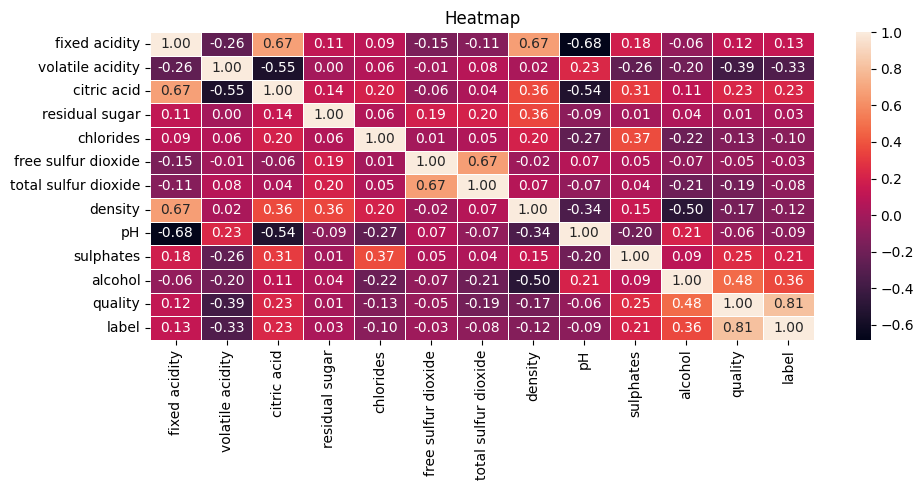

In [9]:
plt.figure(figsize=(10, 5))

corr = df.corr()

sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)

plt.title('Heatmap')
plt.tight_layout()
plt.show()

In [10]:
#split train test
X = df.drop(['quality', 'label'], axis= 1)
y = df['label']

smote = SMOTE(sampling_strategy= 'not majority', random_state= 42)

X_res, y_res = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size= 0.2, random_state= 42)

In [11]:
y_res.value_counts()

label
1    1319
2    1319
0    1319
Name: count, dtype: int64

In [12]:
#standarize

scaler = MinMaxScaler()
#scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [13]:

#seleck kbest
selection_model = SelectKBest(chi2, k = 'all')
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)
X_train.head()


,0,1,2,3,4,5,6,7,8,9,10
0,0.493235,0.212751,0.374361,0.037152,0.181544,0.455978,0.155532,0.526184,0.516858,0.254281,0.235818
1,0.206323,0.515946,0.045528,0.070967,0.114445,0.065928,0.021201,0.405838,0.635283,0.173690,0.299827
2,0.236910,0.246575,0.320000,0.062937,0.083472,0.422535,0.169611,0.508812,0.440945,0.191403,0.246154
3,0.210291,0.390411,0.070000,0.090909,0.131886,0.197183,0.053004,0.389272,0.503937,0.161455,0.446154
4,0.441133,0.198218,0.352221,0.355822,0.121425,0.056338,0.022761,0.550459,0.416623,0.271473,0.538705


In [14]:
#model KNN

model = KNeighborsClassifier(n_neighbors= 1)

model.fit(X_train, y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [15]:
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9116161616161617

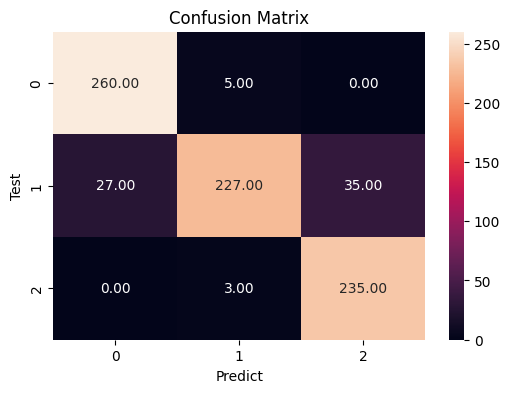

In [16]:
#confusion matrix

matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))

sns.heatmap(matrix, annot= True, fmt= '.2f')
plt.title('Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('Test')

plt.show()

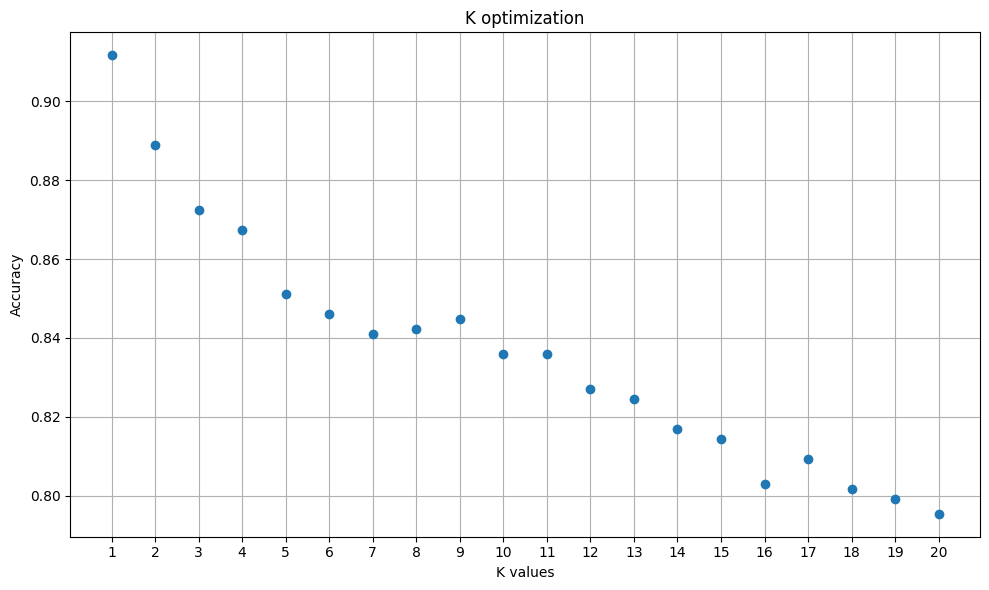

In [17]:
values = range(1, 21)
results = []

for i in values:
    model = KNeighborsClassifier(n_neighbors= i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    results.append(score)

plt.figure(figsize= (10, 6))

plt.plot(values, results, 'o')

plt.xticks(values)
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.title('K optimization')

plt.grid()
plt.tight_layout()
plt.show()


In [18]:
#hiperparams

param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    estimator= model,
    param_grid= param_grid,
    cv= cv,
    scoring= 'accuracy',
    n_jobs= -1,
    verbose=False)

grid.fit(X_train, y_train)

best_params = grid.best_params_
print(best_params)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


/home/vscode/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
800 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/neighbors/_classification.py", l

In [19]:
model = KNeighborsClassifier(**best_params)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9078282828282829

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       265
           1       0.96      0.78      0.86       289
           2       0.86      0.99      0.92       238

    accuracy                           0.91       792
   macro avg       0.91      0.91      0.91       792
weighted avg       0.91      0.91      0.91       792



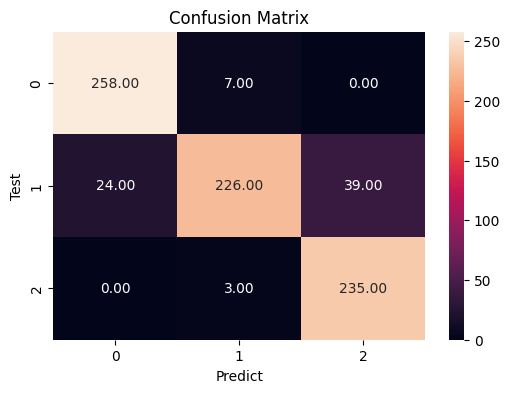

In [21]:
#confusion matrix

matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))

sns.heatmap(matrix, annot= True, fmt= '.2f')
plt.title('Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('Test')

plt.show()

In [ ]:
#save model and scaler for using the function

with open('../models/KNN_red_wines.pkl', 'wb') as archive:
    pickle.dump({'model': model, 'scaler': scaler}, archive)